In [30]:
## imports
import tensorflow as tf
from fastai.vision.all import *
import torch
import time

## Fastai/Pytorch approach

In [25]:
# Set the path to the Dogs vs. Cats dataset
# This is a 37 category pet dataset with roughly 200 images for each class, about 7400 images in total
path = untar_data(URLs.PETS)/"images"

# Created a DataBlock for the dataset, I used a 80/20 split for the data. Also used data augmentation.
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   splitter=RandomSplitter(valid_pct=0.2),
                   get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                   item_tfms=Resize(460),
                   batch_tfms=aug_transforms(size=224, min_scale=0.75))

In [26]:
# Create a DataLoaders object for the dataset
dls = dblock.dataloaders(path, bs=64)

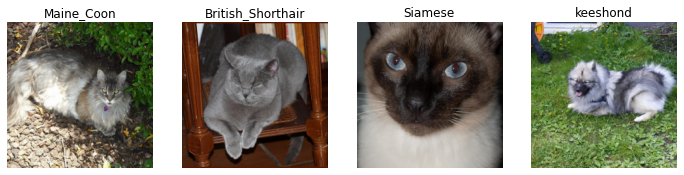

In [27]:
# Shows us an example of what our data looks like
dls.valid.show_batch(max_n=4, nrows=1)

In [28]:
# Load the pre-trained ResNet model
learn = cnn_learner(dls, resnet34, pretrained=True, metrics=accuracy)

In [29]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
## fine tuning here is basically the process of using resnet18's pre-trained previous weights for all layers
## but the last and we train the last layer using the pets data. We then use our new learning rate to imrpove the weights of all of the 
## other layers
learn.fine_tune(4)

/usr/lib/python3/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/ubuntu/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.583197,0.372689,0.123816,00:10


epoch,train_loss,valid_loss,error_rate,time
0,0.559804,0.295010,0.094723,00:12
1,0.411739,0.284234,0.094046,00:12
2,0.294972,0.248421,0.079161,00:12
3,0.210948,0.241171,0.077131,00:12


## TensorFlow Approach

In [11]:
# Set the path to your image dataset
dataset_path = "/path/to/dataset"

# Load the pre-trained ResNet model
model = tf.keras.applications.ResNet18(weights="imagenet")

# number of images to perform inference on
num_images = 10000

# Create a list to store the inference times
inference_times = []

# Perform inference on the images and measure the inference time
for i in range(num_images):
    # Load and preprocess the image
    image_path = f"{dataset_path}/image_{i}.jpg"
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = tf.keras.applications.resnet.preprocess_input(x)
    x = tf.expand_dims(x, axis=0)

    # Perform inference and measure the time
    start_time = time.time()
    preds = model.predict(x)
    end_time = time.time()

    # Calculate the inference time in milliseconds
    inference_time = (end_time - start_time) * 1000

    # Add the inference time to the list
    inference_times.append(inference_time)

    # Print the progress
    print(f"Image {i+1}/{num_images}: Inference time = {inference_time:.2f} ms")

# Calculate the average inference time
average_inference_time = sum(inference_times) / len(inference_times)
print(f"\nAverage Inference Time: {average_inference_time:.2f} ms")

ModuleNotFoundError: No module named 'model'